This part of the assignment is to get you introduced to using gradient descent within torch. You will be using input\
”data” generated (and visualised) like this:

(-0.007663220167160034,
 2.021350711584091,
 -0.008931264281272888,
 2.0575272291898727)

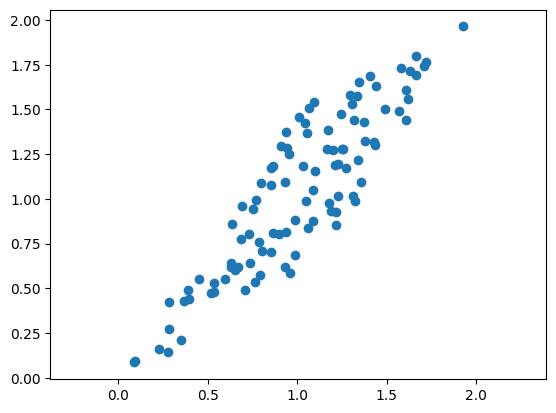

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import torch
# make up some data for x
D = 2
x= torch.rand(100,D)
x[:,0] = x[:,0] + x[:,1]
x[:,1] = 0.5*x[:,0] + x[:,1]
plt.scatter(x[:,0],x[:,1])
plt.axis('equal')

An autoencoder is an unsupervised learner that carries out dimensionality reduction by mapping the data into a lower dimensional space and back ”out” again to form a ”reconstruction”.     

The loss is some measure of the difference between the original data items and their reconstructions.    

![pic](assets/pic1.jpg "Magic Gardens")

## Encoder function
### Input
* the shape of input x: (1,2)    

* w_encoder: weight of encoder   

* b_encoder: bias of encoder   
### Output
* the shape of output: z (1)
### Variable
* encoder:    

 $z = x_0*w{0_encoder} + x_1*w{1encoder} + b_{encoder}$    

* an encoder, which takes the 2-d inputs and produces a 1-dimensional z via a weighted sum plus a bias.     

* The encoder weights will be a 1-by-2 tensor and the encoder bias will be a 1-by-1 tensor.

In [68]:
def encoder(x, w_encoder, b_encoder):
    # Encoder: z = x0*w0_encoder + x_1*w_1_encoder + b_encoder
    z = torch.mm(x,w_encoder) + b_encoder
    return z

In [69]:
def decoder(z,w_decoder,b_decoder):
    z = torch.mm(w_decoder,z) + b_decoder
    return z

In [70]:
import torch
#import torch.nn.functional.mse_loss as MSE
import torch.nn.functional as F
def loss(predict,target):
    return F.mse_loss(predict,target)

In [71]:
def f(x,w):
    wEncoder = w[0]
    wDecoder = w[1]
    bEncoder = w[2]
    bDecoder = w[3]
    v_encoded = encoder(x,wEncoder,bEncoder)
    v_decoded = decoder(v_encoded,wEncoder,bEncoder)
    return v_decoded

In [72]:
# plot loss function
def plotloss(losses,epoches,name):
    plt.plot(epoches,losses)
    plt.title("losses verse epoches in " + name)
    plt.xlabel("epoches")
    plt.ylabel("loss")

In [73]:
import matplotlib.pyplot as plt
# plot function
def plot(x,x_reconstruction,wEncoder,name):
    plt.figure(figsize=(10,10))
    plt.plot([0,wEncoder.detach()[0,0]], [0,wEncoder.detach()[1,0]],'-r')
    plt.scatter(x[:,0].detach().numpy(),x[:,1].detach().numpy(),color='cyan')
    plt.scatter(x_reconstruction.detach()[:,0],x_reconstruction.detach()[:,1])
    plt.axis('equal')

    plt.figure(figsize=(10,10))
    plotloss(losses,epochses,name)
    print("ratio in dimension1: " + str(wEncoder.detach()[0,0].numpy()/wEncoder.detach()[1,0].numpy()))
    print("ratio in dimension2: " + str(wDecoder.detach()[0,0].numpy()/wDecoder.detach()[0,1].numpy()))

ratio in dimension1: 0.98524964
ratio in dimension2: 0.049420394


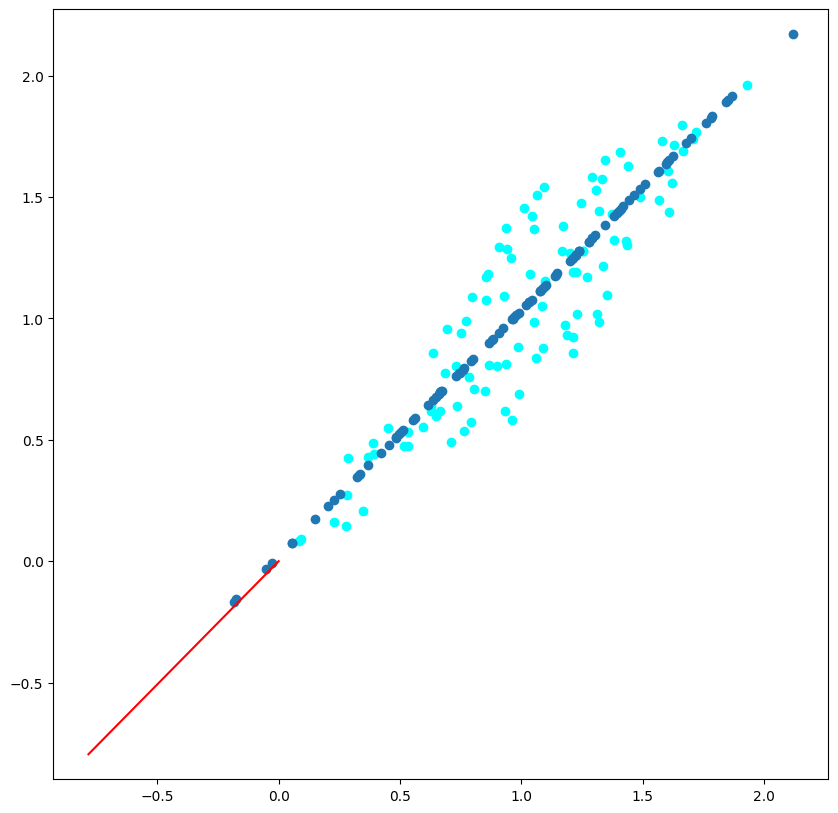

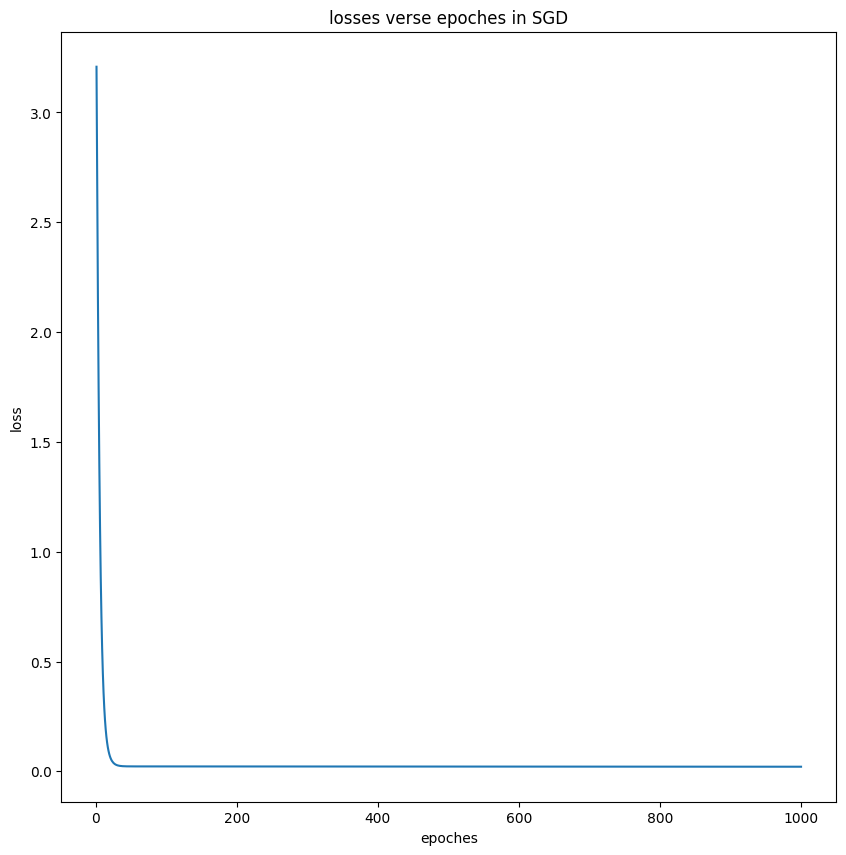

In [74]:
STEPS = 1000
# init the weights and biass in encoder and decoder
wEncoder = torch.randn(D,1, requires_grad=True)
wDecoder = torch.randn(1,D, requires_grad=True)
bEncoder = torch.randn(1, requires_grad=True)
bDecoder = torch.randn(1,D, requires_grad=True)
w = [wEncoder,wDecoder,bEncoder,bDecoder]

# init the SGD optim
opt = torch.optim.SGD(params=w, lr=0.01, momentum=0)
losses = []
epochses = []
epochs = 0

for t in range(STEPS):
    epochs = epochs + 1
    x_reconstruction = torch.rand(100,D)

    # calculate y   
    for i in range(100):
        t = torch.tensor([[x[i,0],x[i,1]]])
        x_reconstruction[i] = f(t,w).T

    # 偏Partial derivative zeroing
    opt.zero_grad()
    l = loss(x_reconstruction,x.detach())
    losses.append(l.detach().numpy())
    epochses.append(epochs)
    #print("epoch "+ str(epochs) + ", loss: "+ str(l.detach().numpy()))
    l.backward()
    opt.step()
# print the ratio of weights of encoder and decoder in two demiensons
# plot scatterplot and a line from the origin to vector formed by the two learned encoder weights
# plot the losses verse epoches
plot(x,x_reconstruction,wEncoder,"SGD")

ratio in dimension1: 0.9591468
ratio in dimension2: -2.6580508


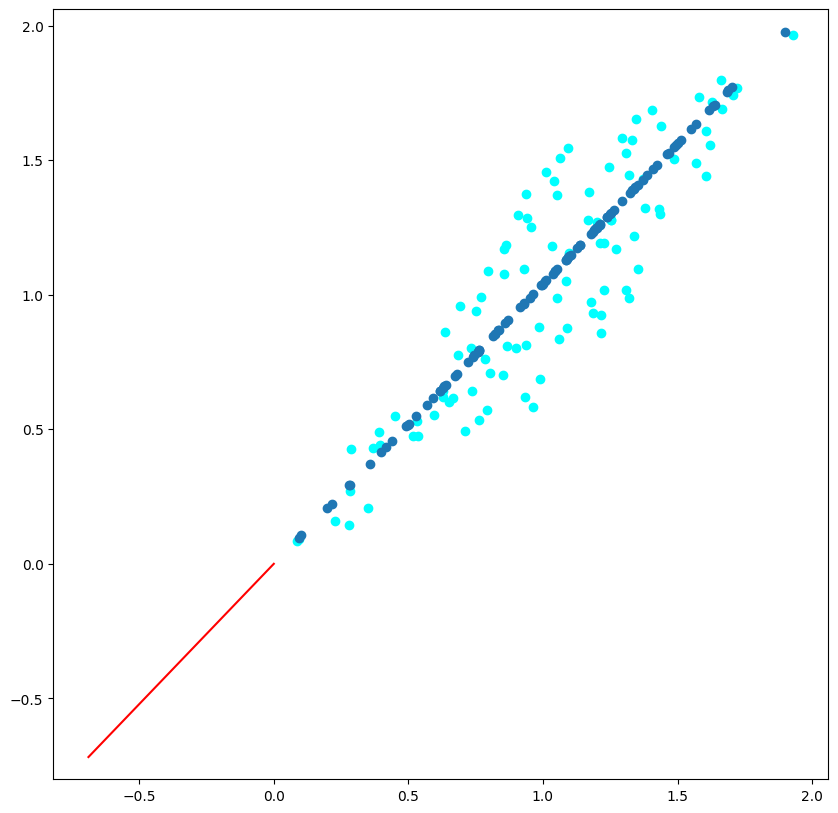

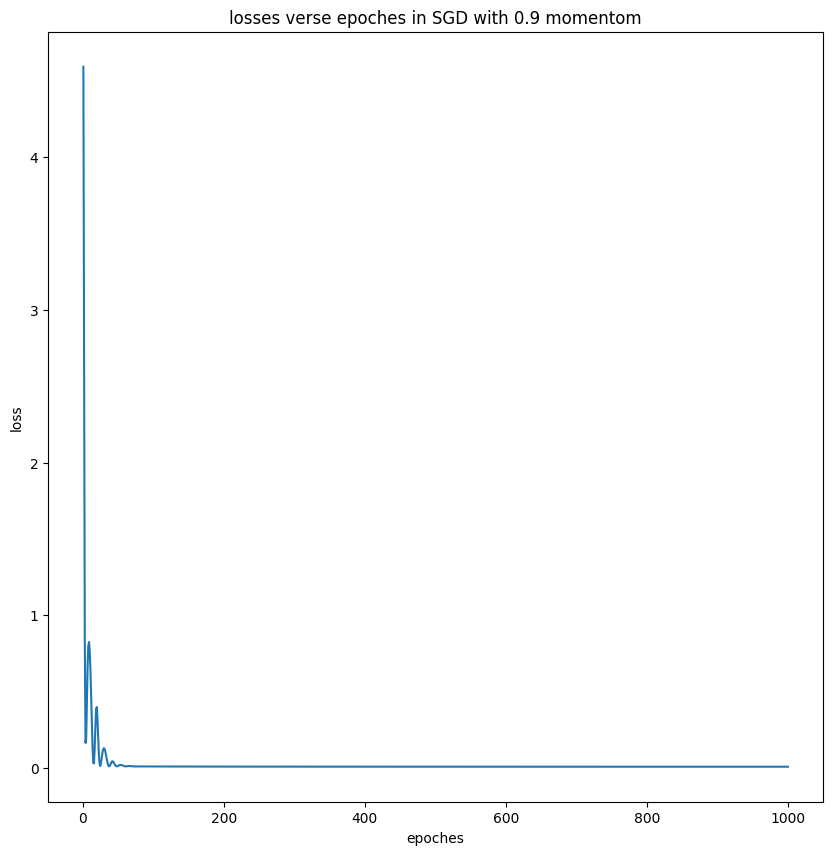

In [75]:
STEPS = 1000
# init the weights and biass in encoder and decoder
wEncoder = torch.randn(D,1, requires_grad=True)
wDecoder = torch.randn(1,D, requires_grad=True)
bEncoder = torch.randn(1, requires_grad=True)
bDecoder = torch.randn(1,D, requires_grad=True)
w = [wEncoder,wDecoder,bEncoder,bDecoder]

# init the SGD optim
opt = torch.optim.SGD(params=w, lr=0.01, momentum=0.9)
losses = []
epochses = []
epochs = 0

for t in range(STEPS):
    epochs = epochs + 1
    x_reconstruction = torch.rand(100,D)

    # calculate y   
    for i in range(100):
        t = torch.tensor([[x[i,0],x[i,1]]])
        x_reconstruction[i] = f(t,w).T

    # Partial derivative zeroing
    opt.zero_grad()

    # calculate the loss
    l = loss(x_reconstruction,x.detach())
    losses.append(l.detach().numpy())
    epochses.append(epochs)
    #print("epoch "+ str(epochs) + ", loss: "+ str(l.detach().numpy()))
    # backward
    l.backward()
    opt.step()

# print the ratio of weights of encoder and decoder in two demiensons
# plot scatterplot and a line from the origin to vector formed by the two learned encoder weights
# plot the losses verse epoches
plot(x,x_reconstruction,wEncoder,"SGD with 0.9 momentom")

ratio in dimension1: 0.96035516
ratio in dimension2: 0.18080537


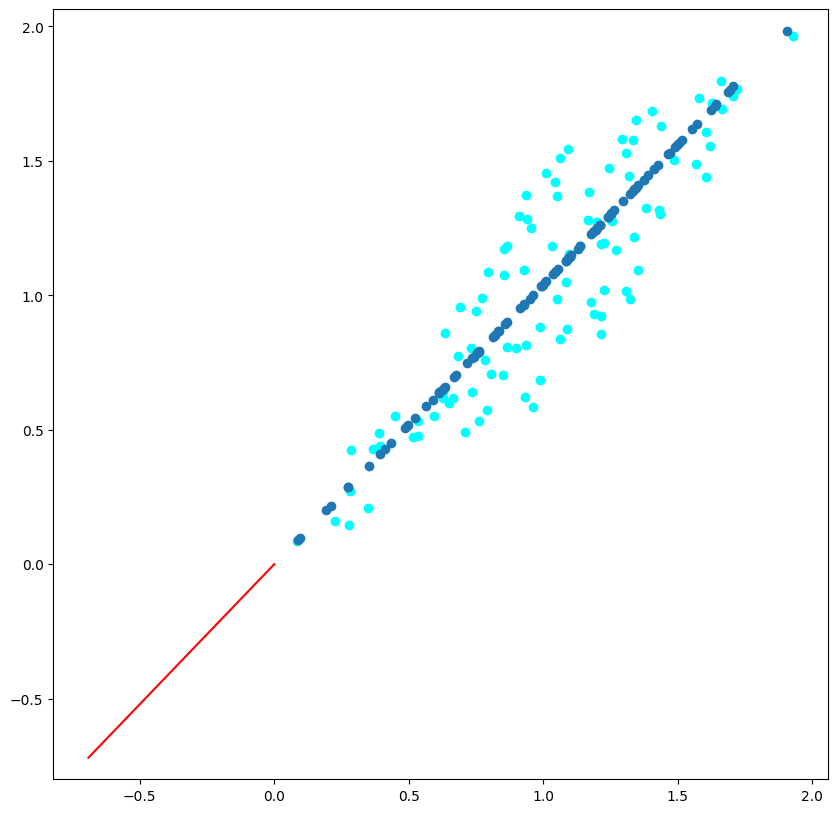

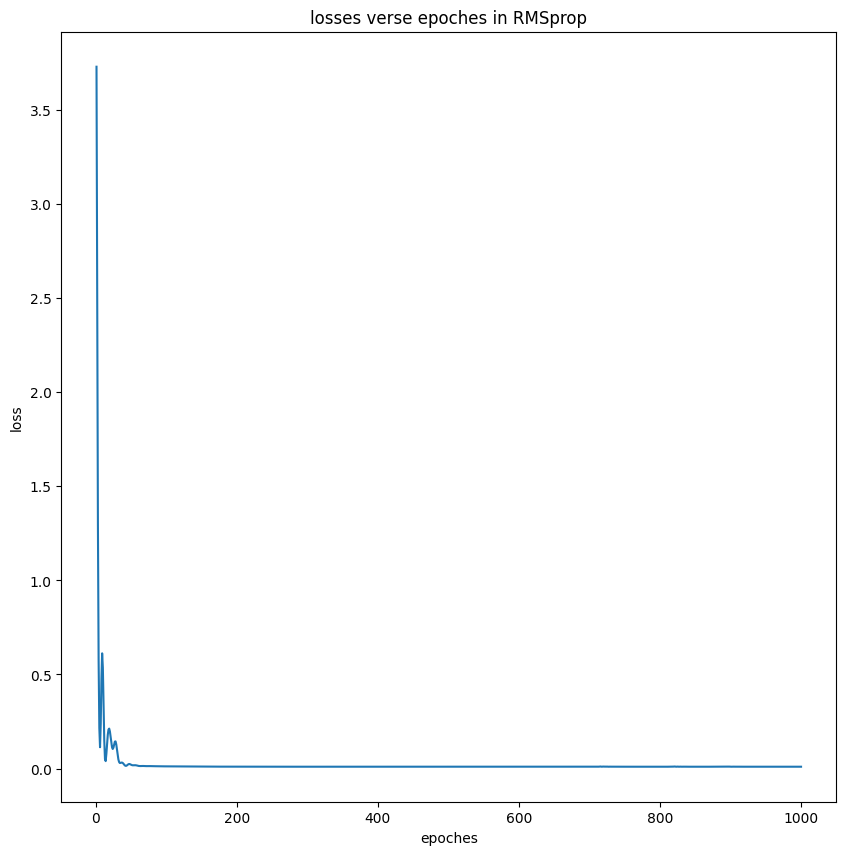

In [78]:

STEPS = 1000
# init the weights and biass in encoder and decoder
wEncoder = torch.randn(D,1, requires_grad=True)
wDecoder = torch.randn(1,D, requires_grad=True)
bEncoder = torch.randn(1, requires_grad=True)
bDecoder = torch.randn(1,D, requires_grad=True)
w = [wEncoder,wDecoder,bEncoder,bDecoder]

# init the RMS optimizer
opt = torch.optim.RMSprop(params=w, lr=0.01, momentum=0.9)
losses = []
epochses = []
epochs = 0

for t in range(STEPS):
    epochs = epochs + 1
    x_reconstruction = torch.rand(100,D)

    # calculate y   
    for i in range(100):
        t = torch.tensor([[x[i,0],x[i,1]]])
        x_reconstruction[i] = f(t,w).T

    # Partial derivative zeroing
    opt.zero_grad()
    
    # calculate the loss based on MSE
    l = loss(x_reconstruction,x.detach())
    losses.append(l.detach().numpy())
    epochses.append(epochs)

    # print("epoch "+ str(epochs) + ", loss: "+ str(l.detach().numpy()))
    # backward
    l.backward()
    opt.step()

# print the ratio of weights of encoder and decoder in two demiensons
# plot scatterplot and a line from the origin to vector formed by the two learned encoder weights
# plot the losses verse epoches
plot(x,x_reconstruction,wEncoder,"RMSprop")

## In a text cell of the notebook, write a couple of concise paragraphs, interpreting what you found.
### Ratio of weight

### SGD
From the lossplot obtained on SGD (without momentom), it took about 400 steps for SGD to gradually converge in a smaller interval. 

### SGD(with 0.9 momenton)
  
SGD (with 0.9 momenton) takes less than 100 steps to converge the loss in a smaller range, but SGD (with 0.9 momenton) makes the optimizer faster, but from its lossplot, its fluctuation is steeper than SGD (without momenton), which is caused by it's less likely to repeatedly jump back and forth in narrow ravines.    

This formula describes how momenton accelerates the optimizer    

$update: \Delta \theta = -\eta Vecotr_\theta L+ \lambda \Delta \theta_{prev}$    

I think can be solved by reducing the value of momenton($\lambda$) 

### RMSprop
RMSprop divided the gradient by it’s RMS (root mean square) value, in each dimension, which is like taking the sign    

RMSProp can effectively alleviate the gradient difference between variables by accumulating the square r of the gradient of each variable, and then dividing the gradient of each variable by r.    

From our RMSpror lossplot, we can find that it can reduce the loss effectively comparing with the SGD lossplot.
